In [ ]:
import torch
import torch.nn as nn
import sys
sys.path.append('..')
import myd2l

In [2]:
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU()
    )

In [3]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5), # 卷积层的dropout发生在通道维度上，即丢弃一些通道
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten()
)

In [4]:
X = torch.randn((1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, X.shape)

Sequential torch.Size([1, 96, 54, 54])
MaxPool2d torch.Size([1, 96, 26, 26])
Sequential torch.Size([1, 256, 26, 26])
MaxPool2d torch.Size([1, 256, 12, 12])
Sequential torch.Size([1, 384, 12, 12])
MaxPool2d torch.Size([1, 384, 5, 5])
Dropout torch.Size([1, 384, 5, 5])
Sequential torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d torch.Size([1, 10, 1, 1])
Flatten torch.Size([1, 10])


iter 1, loss  2.3086
iter 2, loss  2.3031
iter 3, loss  2.3031
iter 4, loss  2.3051
iter 5, loss  2.2981
iter 6, loss  2.3086
iter 7, loss  2.3104
iter 8, loss  2.2981
iter 9, loss  2.3026
iter 10, loss  2.2927
iter 11, loss  2.3075
iter 12, loss  2.3034
iter 13, loss  2.3015
iter 14, loss  2.3108
iter 15, loss  2.2985
iter 16, loss  2.3019
iter 17, loss  2.3064
iter 18, loss  2.3072
iter 19, loss  2.3071
iter 20, loss  2.3069
iter 21, loss  2.2985
iter 22, loss  2.3099
iter 23, loss  2.3027
iter 24, loss  2.3062
iter 25, loss  2.3014
iter 26, loss  2.3037
iter 27, loss  2.3034
iter 28, loss  2.3002
iter 29, loss  2.3019
iter 30, loss  2.2997
iter 31, loss  2.3009
iter 32, loss  2.3078
iter 33, loss  2.3017
iter 34, loss  2.3035
iter 35, loss  2.2992
iter 36, loss  2.2986
iter 37, loss  2.3045
iter 38, loss  2.3054
iter 39, loss  2.3057
iter 40, loss  2.3046
iter 41, loss  2.3021
iter 42, loss  2.3009
iter 43, loss  2.3031
iter 44, loss  2.3054
iter 45, loss  2.2975
iter 46, loss  2.30

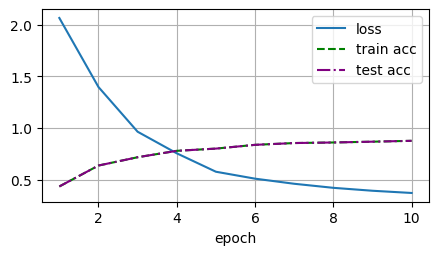

loss  0.3710, train acc  0.88, test acc  0.88
 1317.9 examples/sec on cuda


In [ ]:
batch_size, resize = 128, 224
train_iter, test_iter = myd2l.load_data_fashion_mnist(batch_size, resize)

n_epochs, lr = 10, 0.1
device = torch.device('cuda')
myd2l.train_clf(net, n_epochs, lr, train_iter, test_iter, device)